# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import dataset

In [2]:
dataset = pd.read_csv('master.csv')
X = dataset.drop(['suicides/100k pop', 'suicides_no'], axis=1) #delete some "duplicate" features
y = dataset['suicides/100k pop']

# Preprocessing

In [3]:
X[' gdp_for_year ($) '] = X[' gdp_for_year ($) '].str.replace(',', '').astype(float)

In [5]:
numeric_features = ['year','HDI for year', ' gdp_for_year ($) ', 'population',
                   'gdp_per_capita ($)']
categorical_features = ['country', 'sex', 'age', 'country-year', 'generation']

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, OneHotEncoder, StandardScaler #these all appear to come because HDI wasn't available prior to 2

numeric_transformer = Pipeline(steps=[
    ('imputer', Imputer(missing_values='NaN', strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

clf = Pipeline(steps=[('preprocessor', preprocessor)])
X = clf.fit_transform(X)



C:\Users\Justin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Justin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

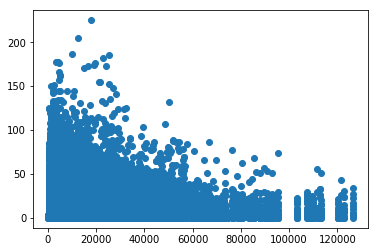

In [11]:
plt.scatter(dataset['gdp_per_capita ($)'], dataset['suicides/100k pop'])
#there appears to be an exponential relationship between gdp per capita and suicides.
#there are a few outliers but I think I'll leave them in. Also there appears to be some underrepresented GDPsaround 1000000

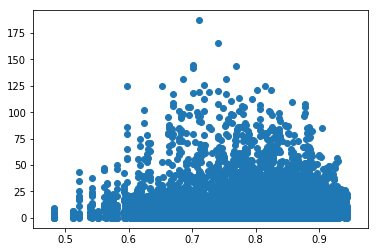

In [12]:
plt.scatter(dataset['HDI for year'], dataset['suicides/100k pop'])
#seems to reach a maximum around 0.77 HDI. Mildly normal distributed

# Try linear regression

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=False)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [17]:
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

# Evaluate performance

In [27]:
from sklearn.metrics import mean_squared_error
rms_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rms_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

In [34]:
print('The RMSE of the test set is: ' + rms_test.astype(str))
print('The RMSE of the training set is: ' + rms_train.astype(str))

The RMSE of the test set is: 14.42298186670045
The RMSE of the training set is: 12.298266364353598
